<a href="https://www.kaggle.com/code/zulqarnain11/heart-disease-risk-insights-and-modeling?scriptVersionId=291079589" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="background: linear-gradient(90deg, #1565C0, #0D47A1); 
            border-radius: 15px; 
            padding: 40px; 
            text-align: center; 
            color: white;
            font-family: 'Arial', sans-serif;
            box-shadow: 0px 4px 20px rgba(0,0,0,0.3);">

  <h1 style="font-size: 3em; margin-bottom: 0.3em; color: #FF5252;">
    Heart Disease Risk Prediction
  </h1>
  
  <h2 style="font-size: 1.5em; margin-top: 0; color: #FFC107;">
    Insights and Modeling
  </h2>
  
  <p style="font-size: 1em; color: #E3F2FD; max-width: 800px; margin: 20px auto;">
    Explore cardiovascular health data through detailed exploratory data analysis (EDA) 
    and build predictive machine learning models to assess heart disease risk.
  </p>
  
</div>


## 📝 Data & Problem Statement

<div style="border-radius: 25px 0 25px 0;
            border: 2px solid #FF5252;
            padding: 20px;
            background: linear-gradient(90deg, #1565C0, #0D47A1);
            color: #E3F2FD;
            font-size: 16px;
            line-height: 1.6;
            box-shadow: 0px 4px 15px rgba(0,0,0,0.2);">

Welcome to this **Heart Disease Risk Analysis Project**!  

**Dataset Overview:**  
The dataset contains information about 15,000 patients with 19 health-related features, including age, gender, BMI, blood pressure, cholesterol levels, lifestyle habits, and family history. Each patient also has a target label: **Heart Disease Risk** (0 = Low Risk, 1 = High Risk).  

**Problem Statement:**  
The goal is to **analyze the factors affecting heart disease risk** and build a predictive model to estimate the likelihood of a patient being at high risk. This will help in **early identification and preventive care**.  

This notebook will guide you through:  
1. **Exploratory Data Analysis (EDA)**  
2. **Feature Engineering & Visualization**  
3. **Model Building using Random Forest**  

</div>


In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bertnardomariouskono/cardiovascular-disease-risk-prediction-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/cardiovascular-disease-risk-prediction-dataset


In [3]:
df=pd.read_csv(os.path.join(path,'healthcare_synthetic_data.csv'))

## 📊 Dataset Overview and Initial Inspection

<div style="border-radius: 25px 0 25px 0;
            border: 2px solid #FF5252;
            padding: 15px;
            background: linear-gradient(90deg, #1565C0, #0D47A1);
            color: #E3F2FD;
            font-size: 18px;
            font-weight: bold;
            line-height: 1.6;
            box-shadow: 0px 4px 15px rgba(0,0,0,0.2);">
This section provides an overview and initial inspection of the dataset.
</div>


In [4]:
df.head()

,Patient_ID,Age,Gender,Height_cm,Weight_kg,BMI,Systolic_BP,Diastolic_BP,Cholesterol_Total,Cholesterol_LDL,Cholesterol_HDL,Fasting_Blood_Sugar,Smoking_Status,Alcohol_Consumption,Physical_Activity_Level,Family_History,Stress_Level,Sleep_Hours,Heart_Disease_Risk
0,PID-00001,60,0,146.9,51.3,23.8,140,89,217,151,52,83,0,1,3,0,1,8,0
1,PID-00002,53,0,161.8,76.6,29.3,128,81,203,119,38,116,0,0,1,0,7,9,0
2,PID-00003,62,1,174.7,92.4,30.3,141,100,173,124,45,90,0,0,0,0,1,7,1
3,PID-00004,73,1,173.3,68.9,22.9,136,96,193,117,45,81,0,0,1,0,2,7,1
4,PID-00005,52,1,178.6,79.8,25.0,122,80,236,153,41,79,0,1,2,0,2,6,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               15000 non-null  object 
 1   Age                      15000 non-null  int64  
 2   Gender                   15000 non-null  int64  
 3   Height_cm                15000 non-null  float64
 4   Weight_kg                15000 non-null  float64
 5   BMI                      15000 non-null  float64
 6   Systolic_BP              15000 non-null  int64  
 7   Diastolic_BP             15000 non-null  int64  
 8   Cholesterol_Total        15000 non-null  int64  
 9   Cholesterol_LDL          15000 non-null  int64  
 10  Cholesterol_HDL          15000 non-null  int64  
 11  Fasting_Blood_Sugar      15000 non-null  int64  
 12  Smoking_Status           15000 non-null  int64  
 13  Alcohol_Consumption      15000 non-null  int64  
 14  Physical_Activity_Leve

In [6]:
df.isnull().sum().sort_values(ascending=False)

Patient_ID                 0
Age                        0
Gender                     0
Height_cm                  0
Weight_kg                  0
BMI                        0
Systolic_BP                0
Diastolic_BP               0
Cholesterol_Total          0
Cholesterol_LDL            0
Cholesterol_HDL            0
Fasting_Blood_Sugar        0
Smoking_Status             0
Alcohol_Consumption        0
Physical_Activity_Level    0
Family_History             0
Stress_Level               0
Sleep_Hours                0
Heart_Disease_Risk         0
dtype: int64

In [7]:
df.shape

(15000, 19)

In [8]:
df.size

285000

### Interpretation

- The dataset contains **15,000 records** with **19 columns** (3 floats, 15 integers, 1 object).  
- There are **no missing values**, which means the dataset is complete and ready for analysis.  
- The dataset is **moderately large**, with a total of **345,000 data points**, making it suitable for training machine learning models.  
- The columns include **demographics, vitals, lifestyle factors, and heart disease risk**, providing a comprehensive overview for predictive analysis.


## 🧑‍🤝‍🧑 Heart Disease Risk by Gender

<div style="border-radius: 25px 0 25px 0;
            border: 2px solid #FF5252;
            padding: 20px;
            background: linear-gradient(90deg, #1565C0, #0D47A1);
            color: #E3F2FD;
            font-size: 16px;
            line-height: 1.6;
            box-shadow: 0px 4px 15px rgba(0,0,0,0.2);">

This analysis examines whether **heart disease risk varies between genders** by calculating the **average risk percentage** for each gender group.

</div>


In [9]:
gender_risk = df.groupby("Gender")["Heart_Disease_Risk"].mean() * 100
gender_risk


Gender
0    43.545001
1    43.656818
Name: Heart_Disease_Risk, dtype: float64

<Axes: xlabel='Gender'>

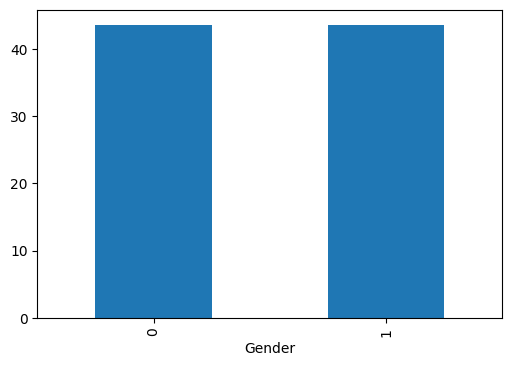

In [10]:
gender_risk.plot(kind="bar", figsize=(6,4))


### 🧠 Interpretation

Both genders show nearly identical heart disease risk  
(~43.5% for females and ~43.7% for males).

This indicates that **gender alone is not a significant predictor** of heart disease risk in this dataset.


In [11]:
df.groupby("Heart_Disease_Risk")["BMI"].mean()


Heart_Disease_Risk
0    26.964362
1    28.069220
Name: BMI, dtype: float64

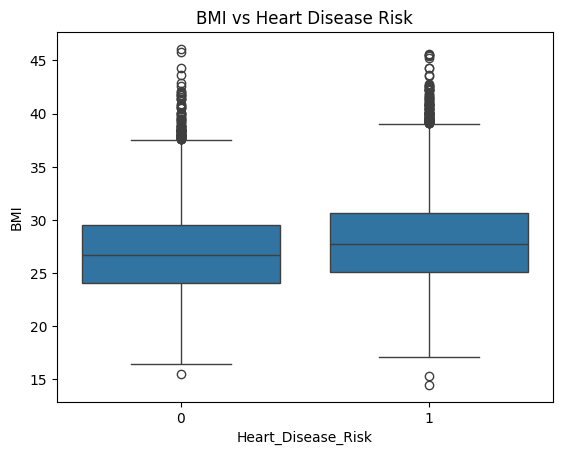

In [12]:
sns.boxplot(x="Heart_Disease_Risk", y="BMI", data=df)
plt.title("BMI vs Heart Disease Risk")
plt.show()


## Age vs Heart Disease Risk

<div style="border-radius: 25px 0 25px 0;
            border: 2px solid #FF5252;
            padding: 18px;
            background: linear-gradient(90deg, #1565C0, #0D47A1);
            color: #E3F2FD;
            font-size: 16px;
            line-height: 1.6;
            box-shadow: 0px 4px 15px rgba(0,0,0,0.2);">

How does **heart disease risk vary across different age groups**, and  
which age range shows the **highest overall risk**?

</div>


In [13]:
bins = [40, 50, 60, 70, 80, 90]
labels = ["41-50", "51-60", "61-70", "71-80", "81-90"]
df["Age_Group"] = pd.cut(df["Age"], bins=bins, labels=labels, right=True)

age_risk = df.groupby("Age_Group",observed=True)["Heart_Disease_Risk"].mean() * 100
age_risk

Age_Group
41-50    36.833646
51-60    44.693542
61-70    51.381559
71-80    57.192076
81-90    61.135371
Name: Heart_Disease_Risk, dtype: float64

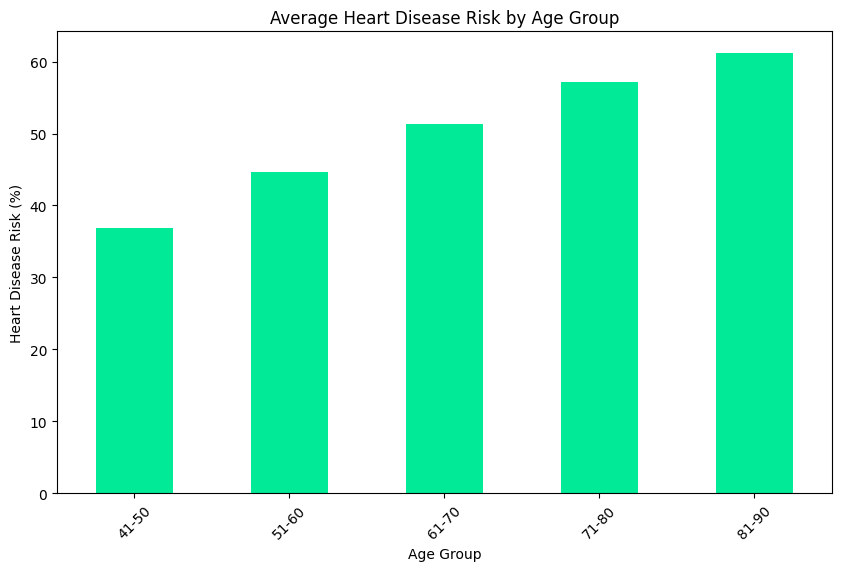

In [14]:
# Plotting Age Group vs Heart Disease Risk
plt.figure(figsize=(10,6))
age_risk.plot(kind="bar", color="#00ea98")
plt.title("Average Heart Disease Risk by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Heart Disease Risk (%)")
plt.xticks(rotation=45)
plt.show()


### 📊 Interpretation

The risk of heart disease **increases with age**.  
- Ages 41-50: ~36.8% risk  
- Ages 51-60: ~44.7% risk  
- Ages 61-70: ~51.4% risk  
- Ages 71-80: ~57.2% risk  
- Ages 81-90: ~61.1% risk  

This shows a clear upward trend in heart disease risk as age progresses.


##  BMI vs Heart Disease Risk

<div style="border-radius: 25px 0 25px 0;
            border: 2px solid #FF5252;
            padding: 18px;
            background: linear-gradient(90deg, #1565C0, #0D47A1);
            color: #E3F2FD;
            font-size: 16px;
            line-height: 1.6;
            box-shadow: 0px 4px 15px rgba(0,0,0,0.2);">
How does **heart disease risk vary across different BMI categories**, and  
which BMI range shows the **highest overall risk**?

</div>


In [15]:
bins = [0, 18.5, 24.9, 29.9, 100]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
df['BMI_Group'] = pd.cut(df['BMI'], bins=bins, labels=labels)

bmi_risk = df.groupby('BMI_Group', observed=True)['Heart_Disease_Risk'].mean() * 100
bmi_risk

BMI_Group
Underweight    29.629630
Normal         36.654888
Overweight     43.519463
Obese          51.769332
Name: Heart_Disease_Risk, dtype: float64

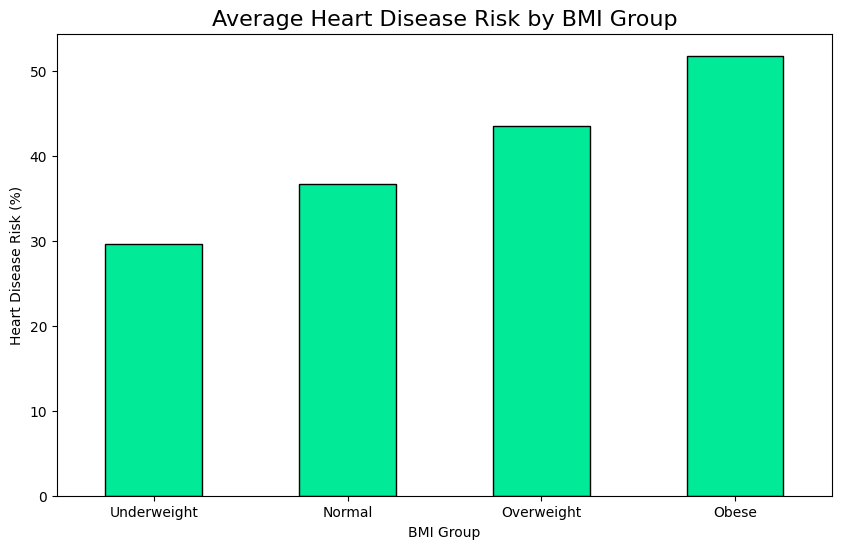

In [16]:
plt.figure(figsize=(10,6))
bmi_risk.plot(kind='bar', color='#00ea98', edgecolor='black')
plt.title("Average Heart Disease Risk by BMI Group", fontsize=16)
plt.ylabel("Heart Disease Risk (%)")
plt.xlabel("BMI Group")
plt.xticks(rotation=0)
plt.show()


### 📌 Interpretation

The **heart disease risk increases with BMI**.  
- **Underweight** individuals have the lowest risk (~30%).  
- **Normal weight**: ~37% risk.  
- **Overweight**: ~44% risk.  
- **Obese** individuals face the **highest risk (~52%)**.  

This indicates a strong positive correlation between BMI and heart disease risk.


## Gender vs Cholesterol Levels

<div style="border-radius: 25px 0 25px 0;
            border: 2px solid #FF5252;
            padding: 18px;
            background: linear-gradient(90deg, #1565C0, #0D47A1);
            color: #E3F2FD;
            font-size: 16px;
            line-height: 1.6;
            box-shadow: 0px 4px 15px rgba(0,0,0,0.2);">

How do **cholesterol levels (Total, LDL, HDL) differ between males and females**,  
and which gender tends to have **higher overall cholesterol**?

</div>


In [17]:
cholesterol_mean = df.groupby('Gender')[['Cholesterol_Total', 'Cholesterol_LDL', 'Cholesterol_HDL']].mean()
cholesterol_mean

,Cholesterol_Total,Cholesterol_LDL,Cholesterol_HDL
Gender,,,
0,216.126345,140.294149,45.757938
1,216.373679,140.418406,40.776769


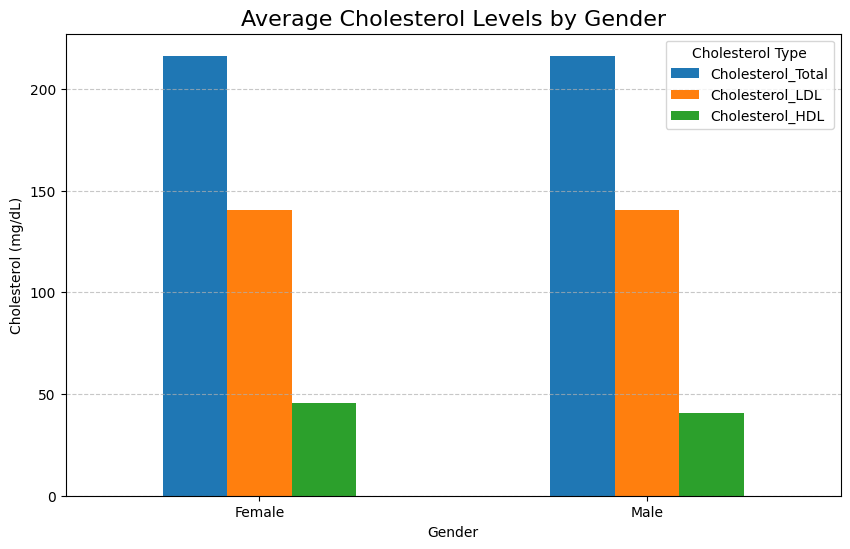

In [18]:
cholesterol_mean.plot(kind='bar', figsize=(10,6))
plt.title('Average Cholesterol Levels by Gender', fontsize=16)
plt.ylabel('Cholesterol (mg/dL)')
plt.xticks(ticks=[0,1], labels=['Female', 'Male'], rotation=0)
plt.legend(title='Cholesterol Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 📊 Interpretation

The **average total cholesterol** and **LDL cholesterol** levels are almost identical for both genders, around **216 mg/dL** and **140 mg/dL** respectively.  
However, **HDL ("good") cholesterol** is higher in females (**45.76 mg/dL**) compared to males (**40.78 mg/dL**), suggesting **females may have slightly better cardiovascular protection** despite similar total cholesterol levels.


##  Blood Pressure vs Heart Disease Risk

<div style="border-radius: 25px 0 25px 0;
            border: 2px solid #FF5252;
            padding: 18px;
            background: linear-gradient(90deg, #1565C0, #0D47A1);
            color: #E3F2FD;
            font-size: 16px;
            line-height: 1.6;
            box-shadow: 0px 4px 15px rgba(0,0,0,0.2);">

How does **heart disease risk change with different ranges of systolic and diastolic blood pressure**,  
and which blood pressure range shows the **highest risk**?

</div>


In [19]:
bp_bins = [0, 120, 130, 140, 150, 160, 200]
bp_labels = ['<120', '120-129', '130-139', '140-149', '150-159', '160+']

df['Systolic_BP_Group'] = pd.cut(df['Systolic_BP'], bins=bp_bins, labels=bp_labels)
df['Diastolic_BP_Group'] = pd.cut(df['Diastolic_BP'], bins=[0, 80, 90, 100, 110, 120], labels=['<80','80-89','90-99','100-109','110+'])

# Calculate mean heart disease risk for each group
systolic_risk = df.groupby('Systolic_BP_Group', observed=True)['Heart_Disease_Risk'].mean() * 100
diastolic_risk = df.groupby('Diastolic_BP_Group', observed=True)['Heart_Disease_Risk'].mean() * 100

systolic_risk, diastolic_risk

(Systolic_BP_Group
 <120       26.486860
 120-129    35.850081
 130-139    43.943827
 140-149    52.456647
 150-159    58.099548
 160+       70.555556
 Name: Heart_Disease_Risk, dtype: float64,
 Diastolic_BP_Group
 <80        29.388222
 80-89      39.561404
 90-99      47.927551
 100-109    55.831853
 110+       63.333333
 Name: Heart_Disease_Risk, dtype: float64)

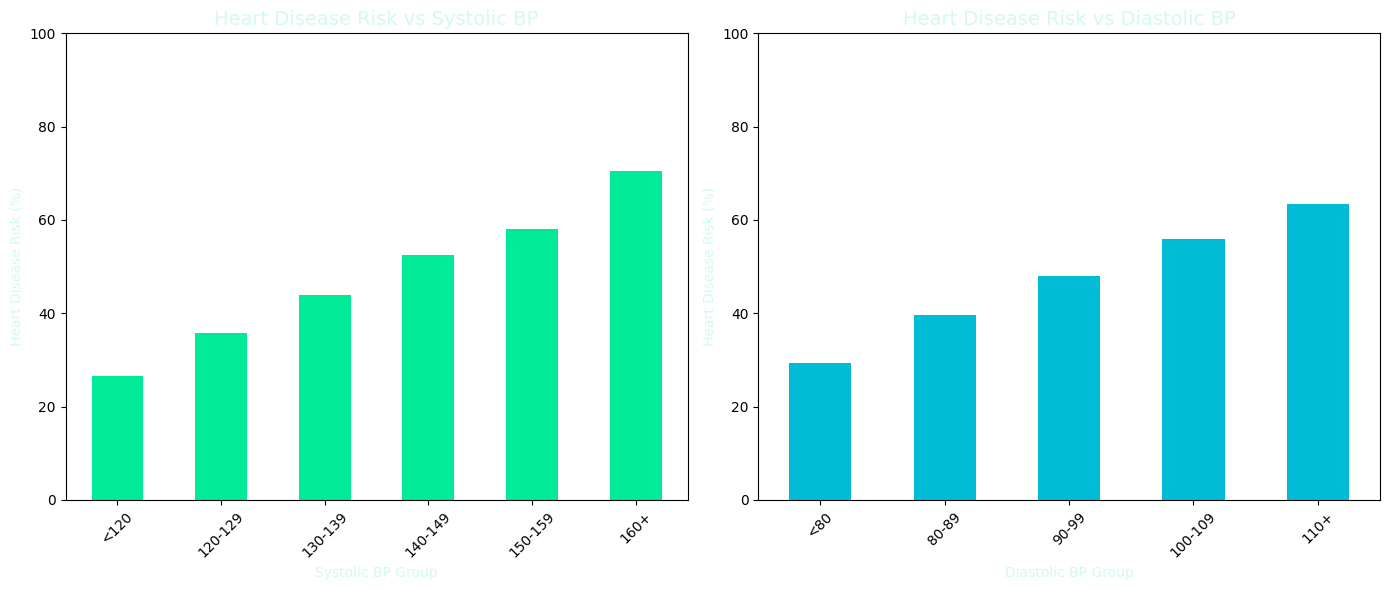

In [20]:
plt.figure(figsize=(14,6))

# Systolic BP
plt.subplot(1,2,1)
systolic_risk.plot(kind='bar', color='#00ea98')
plt.title("Heart Disease Risk vs Systolic BP", fontsize=14, color='#d4fbe8')
plt.ylabel("Heart Disease Risk (%)", color='#d4fbe8')
plt.xlabel("Systolic BP Group", color='#d4fbe8')
plt.xticks(rotation=45)
plt.ylim(0, 100)

# Diastolic BP
plt.subplot(1,2,2)
diastolic_risk.plot(kind='bar', color='#00bcd4')
plt.title("Heart Disease Risk vs Diastolic BP", fontsize=14, color='#d4fbe8')
plt.ylabel("Heart Disease Risk (%)", color='#d4fbe8')
plt.xlabel("Diastolic BP Group", color='#d4fbe8')
plt.xticks(rotation=45)
plt.ylim(0, 100)

plt.tight_layout()
plt.show()


### 🩺 Interpretation: Blood Pressure vs Heart Disease Risk

- **Systolic BP:** Heart disease risk increases steadily with higher systolic blood pressure.  
  The `160+` mmHg group has the **highest risk (~70.6%)**.

- **Diastolic BP:** Similarly, higher diastolic BP groups show higher risk.  
  The `110+` mmHg group has the **highest risk (~63.3%)**.

- **Insight:** Maintaining normal blood pressure is crucial for reducing heart disease risk.


## Smoking Status vs Heart Disease Risk
<div style="border-radius: 25px 0 25px 0;
            border: 2px solid #FF5252;
            padding: 18px;
            background: linear-gradient(90deg, #1565C0, #0D47A1);
            color: #E3F2FD;
            font-size: 16px;
            line-height: 1.6;
            box-shadow: 0px 4px 15px rgba(0,0,0,0.2);">
How does smoking status (smoker vs non-smoker) affect the heart disease risk, and which group shows higher risk?

</div>

In [21]:
smoking_risk = df.groupby('Smoking_Status', observed=True)['Heart_Disease_Risk'].mean() * 100
smoking_risk

Smoking_Status
0    32.148642
1    70.277469
Name: Heart_Disease_Risk, dtype: float64

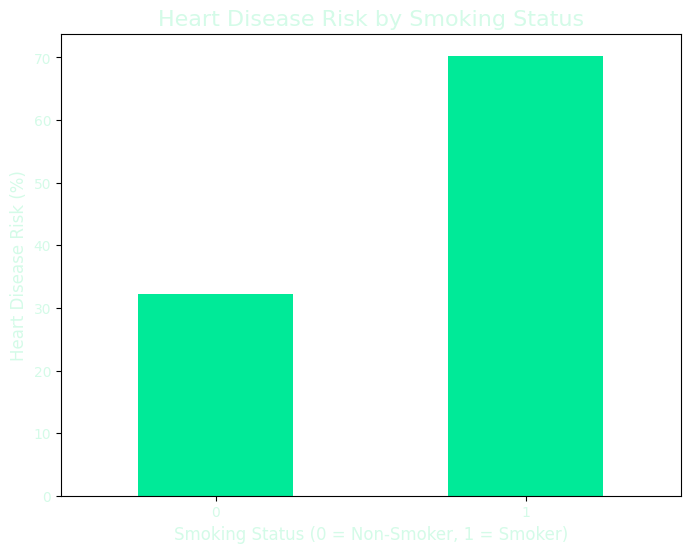

In [22]:
plt.figure(figsize=(8,6))
smoking_risk.plot(kind='bar', color='#00ea98')
plt.title('Heart Disease Risk by Smoking Status', fontsize=16, color='#d4fbe8')
plt.xlabel('Smoking Status (0 = Non-Smoker, 1 = Smoker)', fontsize=12, color='#d4fbe8')
plt.ylabel('Heart Disease Risk (%)', fontsize=12, color='#d4fbe8')
plt.xticks(rotation=0, color='#d4fbe8')
plt.yticks(color='#d4fbe8')
plt.show()

### 📌 Interpretation

The data shows that **smokers (Smoking_Status = 1)** have an average heart disease risk of **70.28%**,  
while **non-smokers (Smoking_Status = 0)** have a much lower risk of **32.15%**.  

This highlights that **smoking dramatically increases the likelihood of heart disease**.


### Alcohol Consumption vs Heart Disease Risk

<div style="border-radius: 25px 0 25px 0;
            border: 2px solid #FF5252;
            padding: 18px;
            background: linear-gradient(90deg, #1565C0, #0D47A1);
            color: #E3F2FD;
            font-size: 16px;
            line-height: 1.6;
            box-shadow: 0px 4px 15px rgba(0,0,0,0.2);">

How does **alcohol consumption influence heart disease risk**,  
and is there a **significant difference between drinkers and non-drinkers**?

</div>


In [23]:
alcohol_risk = df.groupby("Alcohol_Consumption", observed=True)["Heart_Disease_Risk"].mean() * 100
alcohol_risk

Alcohol_Consumption
0    43.988270
1    43.020711
2    43.938422
Name: Heart_Disease_Risk, dtype: float64

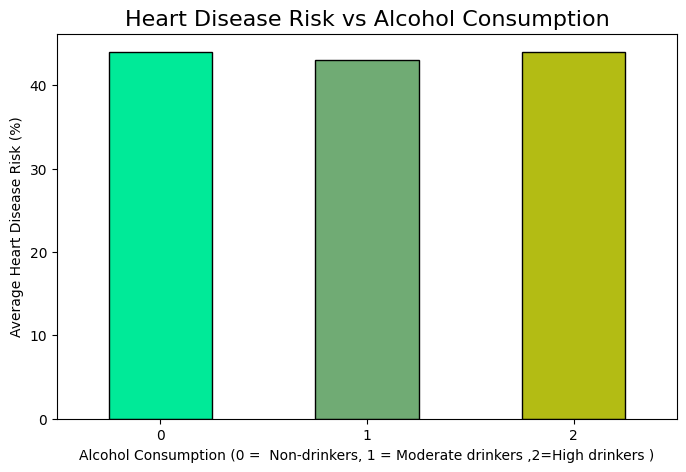

In [24]:
plt.figure(figsize=(8,5))
alcohol_risk.plot(kind='bar', color=['#00ea98','#70ab74','#b3bc14'], edgecolor='black')
plt.title("Heart Disease Risk vs Alcohol Consumption", fontsize=16)
plt.xlabel("Alcohol Consumption (0 =  Non-drinkers, 1 = Moderate drinkers ,2=High drinkers )")
plt.ylabel("Average Heart Disease Risk (%)")
plt.xticks(rotation=0)
plt.show()

### 📝 Interpretation: Alcohol Consumption vs Heart Disease Risk

The dataset shows **three categories of alcohol consumption**: 0 (non-drinkers), 1 (moderate), and 2 (high).  
The **heart disease risk** across these groups is very similar:

- Non-drinkers (0): 43.99%  
- Moderate drinkers (1): 43.02%  
- High drinkers (2): 43.94%  

This indicates that, based on this data, **alcohol consumption does not significantly affect heart disease risk**.


## Family History vs Heart Disease Risk
<div style="border-radius: 25px 0 25px 0;
            border: 2px solid #FF5252;
            padding: 18px;
            background: linear-gradient(90deg, #1565C0, #0D47A1);
            color: #E3F2FD;
            font-size: 16px;
            line-height: 1.6;
            box-shadow: 0px 4px 15px rgba(0,0,0,0.2);">

Does having a **family history of heart disease** significantly affect an individual's **heart disease risk**?  
Compare the risk for those with and without family history.

</div>


In [25]:
family_history_risk = df.groupby('Family_History', observed=True)['Heart_Disease_Risk'].mean() * 100
family_history_risk

Family_History
0    39.413655
1    67.409719
Name: Heart_Disease_Risk, dtype: float64

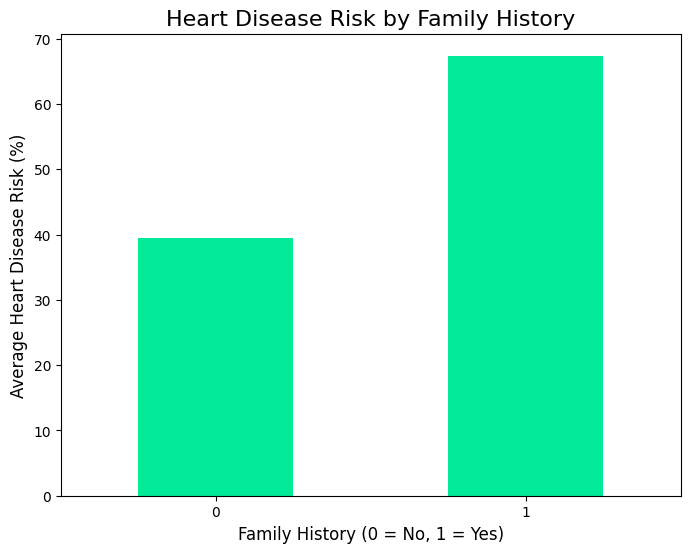

In [26]:
plt.figure(figsize=(8,6))
family_history_risk.plot(kind='bar', color='#00ea98')
plt.title('Heart Disease Risk by Family History', fontsize=16)
plt.xlabel('Family History (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Average Heart Disease Risk (%)', fontsize=12)
plt.xticks(rotation=0)
plt.show()

### 📝 Interpretation

Individuals with a **family history of heart disease** have a significantly higher average **heart disease risk (67.41%)** compared to those without a family history (39.41%).  
This suggests that **genetic factors** play an important role in heart disease susceptibility.


## Stress Level vs heart disease risk
<div style="border-radius: 25px 0 25px 0;
            border: 2px solid #FF5252;
            padding: 18px;
            background: linear-gradient(90deg, #1565C0, #0D47A1);
            color: #E3F2FD;
            font-size: 16px;
            line-height: 1.6;
            box-shadow: 0px 4px 15px rgba(0,0,0,0.2);">

How does **stress level** affect **heart disease risk**,  
and which stress level category shows the **highest risk**?

</div>


In [27]:
stress_risk = df.groupby('Stress_Level', observed=True)['Heart_Disease_Risk'].mean() * 100
stress_risk

Stress_Level
1     33.842070
2     37.027027
3     38.970588
4     42.424242
5     42.228152
6     46.843854
7     46.693657
8     46.179183
9     51.808874
10    50.000000
Name: Heart_Disease_Risk, dtype: float64

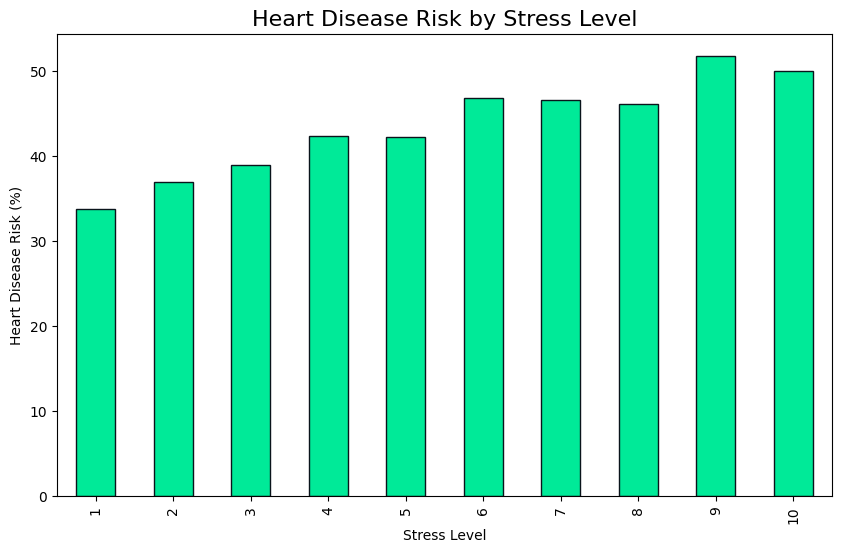

In [28]:
plt.figure(figsize=(10,6))
stress_risk.plot(kind='bar', color='#00ea98', edgecolor='#0a141b')
plt.title('Heart Disease Risk by Stress Level', fontsize=16)
plt.xlabel('Stress Level')
plt.ylabel('Heart Disease Risk (%)')
plt.show()

### 📝 Interpretation: Stress Level vs Heart Disease Risk

Heart disease risk **increases with higher stress levels**.  
- Individuals with **low stress (1–3)** have a **risk around 34–39%**.  
- Those with **very high stress (9–10)** show the **highest risk (~50–52%)**.  

This indicates that **stress is a strong contributing factor** to heart disease.


## Sleep Hours vs Heart Disease Risk
<div style="border-radius: 25px 0 25px 0;
            border: 2px solid #FF5252;
            padding: 18px;
            background: linear-gradient(90deg, #1565C0, #0D47A1);
            color: #E3F2FD;
            font-size: 16px;
            line-height: 1.6;
            box-shadow: 0px 4px 15px rgba(0,0,0,0.2);">

How do **sleep hours** impact **heart disease risk**,  
and is there a trend of higher risk with less or more sleep?

</div>

In [29]:
sleep_risk = df.groupby('Sleep_Hours', observed=True)['Heart_Disease_Risk'].mean() * 100
sleep_risk


Sleep_Hours
4     46.217331
5     45.201911
6     43.785247
7     44.221777
8     41.322662
9     37.651123
10    39.784946
Name: Heart_Disease_Risk, dtype: float64

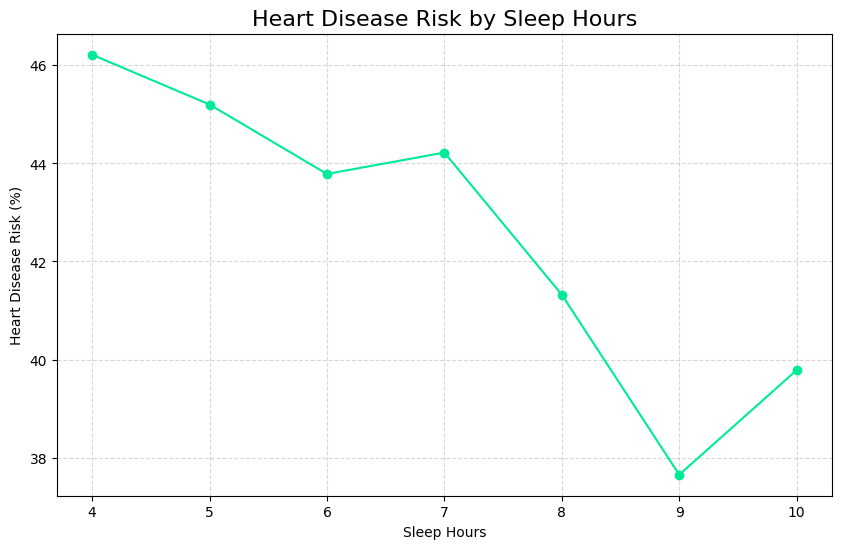

In [30]:
plt.figure(figsize=(10,6))
sleep_risk.plot(kind='line', marker='o', color='#00ea98')
plt.title('Heart Disease Risk by Sleep Hours', fontsize=16)
plt.xlabel('Sleep Hours')
plt.ylabel('Heart Disease Risk (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### 📝 Interpretation: Sleep Hours vs Heart Disease Risk

Heart disease risk shows a **U-shaped relationship with sleep hours**:  
- **Very low sleep (4–5 hours)** is associated with **high risk (~45–46%)**.  
- **Moderate sleep (6–8 hours)** shows the **lowest risk (~41–44%)**.  
- **Very high sleep (9–10 hours)** risk slightly increases again (~38–40%).  

This suggests that **moderate sleep duration is protective**, while too little or too much sleep can increase risk.


## 🏋️ Random Forest Model Training

<div style="border-radius: 25px 0 25px 0;
            border: 2px solid #FF5252;
            padding: 18px;
            background: linear-gradient(90deg, #1565C0, #0D47A1);
            color: #E3F2FD;
            font-size: 16px;
            line-height: 1.6;
            box-shadow: 0px 4px 15px rgba(0,0,0,0.2);">

We are training a **Random Forest Classifier** to predict **heart disease risk**.  

</div>


In [31]:
# Define features and target
features = ['Age', 'Gender', 'Height_cm', 'Weight_kg', 'BMI',
            'Systolic_BP', 'Diastolic_BP', 'Cholesterol_Total', 'Cholesterol_LDL',
            'Cholesterol_HDL', 'Fasting_Blood_Sugar', 'Smoking_Status',
            'Alcohol_Consumption', 'Physical_Activity_Level', 'Family_History',
            'Stress_Level', 'Sleep_Hours']

X = df[features]
y = df['Heart_Disease_Risk']

# 'Heart_Disease_Risk' already contains 0s and 1s, so we can use it directly as y_class
y_class = y

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [32]:
# Predictions
y_pred = rf_model.predict(X_test)


Accuracy: 0.729

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.81      0.77      1694
           1       0.72      0.62      0.67      1306

    accuracy                           0.73      3000
   macro avg       0.73      0.72      0.72      3000
weighted avg       0.73      0.73      0.73      3000



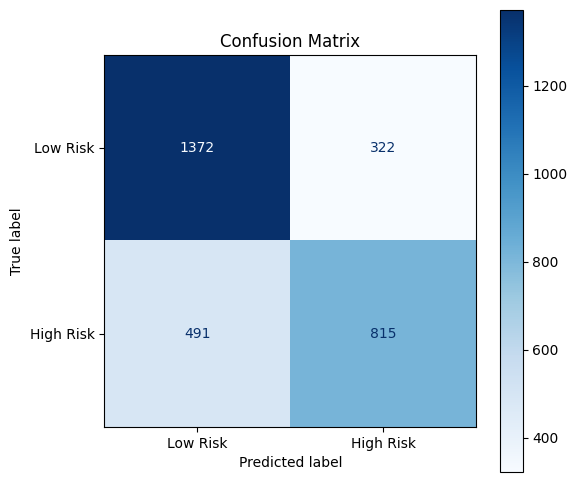

In [33]:
## ✅ Model Evaluation: Confusion Matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np # Import numpy for unique

# Accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)


unique_labels = np.unique(y_test)
if len(unique_labels) == 1:
    if 0 in unique_labels:
        current_display_labels = ["Low Risk"]
    else:
        current_display_labels = ["High Risk"]
elif len(unique_labels) == 2 and 0 in unique_labels and 1 in unique_labels:
    current_display_labels = ["Low Risk", "High Risk"]
else:
    # Fallback for unexpected unique_labels
    current_display_labels = [str(label) for label in unique_labels]

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=current_display_labels)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6,6))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title("Confusion Matrix")
plt.show()


## 👍 Enjoyed This Notebook?

<div style="border-radius: 25px 0 25px 0;
            border: 2px solid #FF5252;
            padding: 18px;
            background: linear-gradient(90deg, #1565C0, #0D47A1);
            color: #E3F2FD;
            font-size: 16px;
            line-height: 1.6;
            box-shadow: 0px 4px 15px rgba(0,0,0,0.2);">
If you found this notebook helpful, please give it an <strong>UPVOTE 👍</strong>!  
Your support motivates me to create more interactive and insightful analyses*.  
Thank you! 😊
</div>
